<a href="https://colab.research.google.com/github/ferdinand1810/M-todos-Num-ricos-Aplicados-en-Ingenieria/blob/main/Redes_Tuberias_NewtonRapson_Revisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ANALISIS DE SISTEMA DE REDES DE AGUA USANDO EL METODO DE NEWTON-RAPSON REVISADO.**

El siguiente script ha sido trabajado con los datos y formulaciones del articulo:
Spiliotis, M., & Tsakiris, G. (2011). Water distribution system analysis: Newton-Raphson method revisited. Journal of Hydraulic Engineering, 137(8), 852-855.

  La carga hidráulica total en el Nodo 1 se considera conocida y equivale a 200 m (msnm). Dado que el método requiere valores iniciales, se asumen cargas hidráulicas iniciales en cada nodo. Asuma una carga hidráulica inicial en cada nodo. La rugosidad absoluta ε =3· 10-6 m, la viscosidad cinemática del agua es υ =1.004· 10-6 m${^2}$/s
  
1). Determine el caudal en cada ramal o tubería. Por ejemplo, para el caudal en el ramal 2-3 es igual a:

  $Q_{2 \rightarrow 3}$ = $
   \left[ - signo (h_2 - h_3) \sqrt{ \frac{2gD_{23} |h_2 - h_3|}{L_{23}} } \cdot \log \left( \frac{\varepsilon}{3.7 D_{23}} + \frac{2.51 \nu}{D_{23} \sqrt{ \frac{2g D_{23} |h_2 - h_3|}{L_{23}} }} \right) \cdot \frac{\pi D_{23}^2}{2} \right]$

  Esto se refiere a la ecuación de masa en el nodo 3 ($n = 3$), según la ecuación de masa en el nodo 2. Es fácil verificar que $D_{32} = D_{23}$, $L_{32} = L_{23}$, por lo tanto $Q_{32} = -Q_{23}$.

2). Determinar la función matricial inicial $F - q$:

  
  $(F - q)_k$ =
  \begin{bmatrix}
                 F_2 - 0.015 \\
                 F_3 - 0.010 \\
                 F_4 - 0.035 \\
                 F_5 - 0.040 \\
                 F_6 - 0.030
  \end{bmatrix} _x


  Donde:
  F_k =
  \begin{bmatrix}
    Q_{12} + Q_{52} + Q_{32} \\
    Q_{23} + Q_{43} \\
    Q_{34} + Q_{54} \\
    Q_{45} + Q_{25} + Q_{65} \\
    Q_{16} + Q_{56} \\
  \end{bmatrix}_k

 3) Determinar las derivadas parciales de las funciones $F$ con respecto a la carga hidráulica:

  J_k =
  \begin{bmatrix}
    \frac{\partial Q_{12}}{\partial h_2} + \frac{\partial Q_{52}}{\partial h_2} + \frac{\partial Q_{32}}{\partial h_2} & \frac{\partial Q_{32}}{\partial h_3} & 0 & \frac{\partial Q_{52}}{\partial h_5} & 0 \\
    \frac{\partial Q_{23}}{\partial h_2} & \frac{\partial Q_{23}}{\partial h_3} + \frac{\partial Q_{43}}{\partial h_3} & \frac{\partial Q_{43}}{\partial h_4} & 0 & 0 \\
    0 & \frac{\partial Q_{34}}{\partial h_3} & \frac{\partial Q_{34}}{\partial h_4} + \frac{\partial Q_{54}}{\partial h_4} & \frac{\partial Q_{54}}{\partial h_5} & 0 \\
    \frac{\partial Q_{25}}{\partial h_2} & 0 & \frac{\partial Q_{45}}{\partial h_4} & \frac{\partial Q_{45}}{\partial h_5} + \frac{\partial Q_{25}}{\partial h_5} + \frac{\partial Q_{65}}{\partial h_5} & \frac{\partial Q_{65}}{\partial h_6} \\
    0 & 0 & 0 & \frac{\partial Q_{56}}{\partial h_5} & \frac{\partial Q_{16}}{\partial h_6} + \frac{\partial Q_{56}}{\partial h_6} \\
  \end{bmatrix}_k

  4). Calcular la primera corrección desconocida $\Delta h_k$ usando Newton-Raphson:


  $\Delta h_k = -J_k^{-1} \cdot (F - q)_k$


  Donde:


  $\Delta h_k$ =
  \begin{bmatrix}
    \Delta h_2 \\
    \Delta h_3 \\
    \Delta h_4 \\
    \Delta h_5 \\
    \Delta h_6 \\
  \end{bmatrix}_k


5). Si $\Delta h_k$ es significativamente diferente de cero, repetir desde el paso 4. Si no, el proceso finaliza.


📘 Iteración 1 | ||Δh|| = 5.4910e+00
Desde  Hacia    Q (m³/s)    h_Desde (m)    h_Hacia (m)     ||Δh||
1      2         0.07716       200.0000       199.4669 5.4910e+00
2      3         0.00177       199.4669       199.4624 5.4910e+00
3      4         0.00127       199.4624       199.4555 5.4910e+00
4      5        -0.00016       199.4555       199.4580 5.4910e+00
2      5         0.00187       199.4669       199.4580 5.4910e+00
5      4         0.00016       199.4580       199.4555 5.4910e+00
6      5        -0.00040       199.4353       199.4580 5.4910e+00
1      6         0.01451       200.0000       199.4353 5.4910e+00

📘 Iteración 2 | ||Δh|| = 1.4844e+00
Desde  Hacia    Q (m³/s)    h_Desde (m)    h_Hacia (m)     ||Δh||
1      2         0.09982       200.0000       199.1490 1.4844e+00
2      3         0.01405       199.1490       198.9768 1.4844e+00
3      4         0.01041       198.9768       198.6997 1.4844e+00
4      5        -0.00104       198.6997       198.7648 1.4844e+00
2 

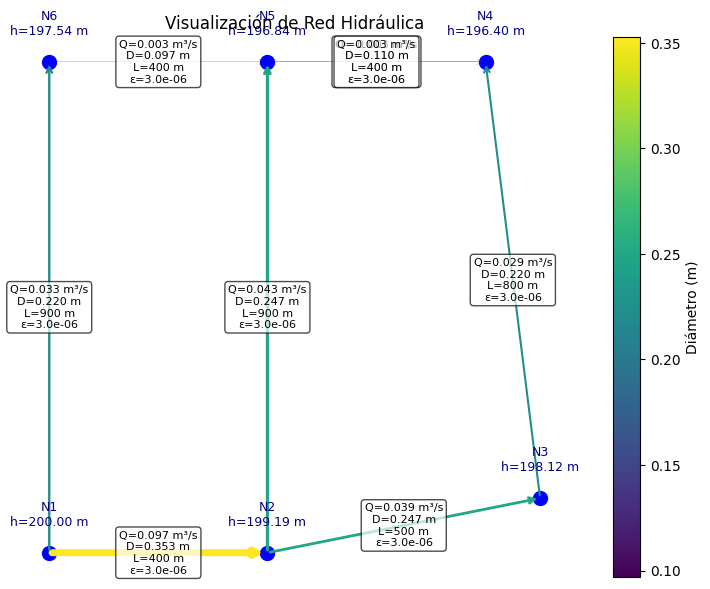

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# === PARÁMETROS FÍSICOS ===
g = 9.81                   # gravedad (m/s²)
nu = 1.004e-6              # viscosidad cinemática del agua (m²/s)
e = 3e-6                   # rugosidad absoluta (m)

# === RED HIDRÁULICA ===
tuberias = {
    (1, 2): {'L': 400, 'D': 0.3526},
    (2, 3): {'L': 500, 'D': 0.2468},
    (3, 4): {'L': 800, 'D': 0.2204},
    (4, 5): {'L': 400, 'D': 0.1102},
    (2, 5): {'L': 900, 'D': 0.2468},
    (5, 4): {'L': 400, 'D': 0.1102},
    (6, 5): {'L': 400, 'D': 0.0968},
    (1, 6): {'L': 900, 'D': 0.2204},
}

n_nodos = 6
q = np.array([0, 0.015, 0.010, 0.035, 0.040, 0.030])
h_ini = np.full(n_nodos, 197.0)
h_ini[0] = 200.0

def caudal(h_i, h_j, D, L):
    delta_h = h_i - h_j
    if abs(delta_h) < 1e-10:
        return 0.0
    gD = 2 * g * D
    sqrt_term = np.sqrt(gD * abs(delta_h) / L)
    log_term = np.log10((e / (3.7 * D)) + (2.51 * nu) / (D * sqrt_term))
    return -np.sign(delta_h) * sqrt_term * log_term * (np.pi * D**2) / 2

def calcular_F(h):
    F = np.zeros(n_nodos)
    for (i, j), props in tuberias.items():
        Qij = caudal(h[i-1], h[j-1], **props)
        F[i-1] -= Qij
        F[j-1] += Qij
    return F[1:] - q[1:]

def calcular_Jacobiano(h, delta=1e-6):
    F0 = calcular_F(h)
    J = np.zeros((n_nodos - 1, n_nodos - 1))
    for i in range(1, n_nodos):
        h_pert = h.copy()
        h_pert[i] += delta
        J[:, i - 1] = (calcular_F(h_pert) - F0) / delta
    return J

def newton_raphson(h, tol=1e-6, max_iter=200):
    for it in range(max_iter):
        Fq = calcular_F(h)
        J = calcular_Jacobiano(h)
        try:
            delta_h = -np.linalg.solve(J, Fq)
        except np.linalg.LinAlgError:
            print(f"[Iter {it+1}] ❌ Jacobiano singular.")
            return None
        h[1:] += delta_h
        norm_dh = np.linalg.norm(delta_h)
        print(f"\n📘 Iteración {it+1} | ||Δh|| = {norm_dh:.4e}")
        print(f"{'Desde':<6} {'Hacia':<6} {'Q (m³/s)':>10} {'h_Desde (m)':>14} {'h_Hacia (m)':>14} {'||Δh||':>10}")
        for (i, j), props in tuberias.items():
            Q = caudal(h[i-1], h[j-1], **props)
            print(f"{i:<6} {j:<6} {Q:>10.5f} {h[i-1]:>14.4f} {h[j-1]:>14.4f} {norm_dh:>10.4e}")
        if np.linalg.cond(J) > 1e10:
            print(f"⚠️ Condición del Jacobiano muy alta.")
            return None
        if norm_dh < tol:
            print(f"\n✅ Convergencia alcanzada en {it+1} iteraciones.")
            return h
    raise Exception("No convergió")

h_final = newton_raphson(h_ini.copy())
print("\nCargas hidráulicas finales:")
for i, h in enumerate(h_final, 1):
    print(f"h{i} = {h:.4f} m")

print("\nCaudales por ramal:")
caudales_finales = {}
for (i, j), props in tuberias.items():
    Q = caudal(h_final[i-1], h_final[j-1], **props)
    caudales_finales[(i, j)] = Q
    print(f"Q{i}->{j} = {Q:.5f} m³/s")

def graficar_red(h_final, caudales):
    fig, ax = plt.subplots(figsize=(10, 6))
    pos_nodos = {
        1: (0, 0), 2: (400, 0), 3: (900, 100),
        4: (800, 900), 5: (400, 900), 6: (0, 900),
    }
    diametros = [props['D'] for props in tuberias.values()]
    norm = mcolors.Normalize(vmin=min(diametros), vmax=max(diametros))
    cmap = cm.viridis
    max_q = max(abs(q) for q in caudales.values()) + 1e-6

    for (i, j), props in tuberias.items():
        x0, y0 = pos_nodos[i]
        x1, y1 = pos_nodos[j]
        Q = caudales[(i, j)]
        color = cmap(norm(props['D']))
        ancho = 5 * abs(Q) / max_q
        ax.annotate("",
                    xy=(x1, y1), xytext=(x0, y0),
                    arrowprops=dict(arrowstyle="->", color=color, lw=ancho))
        xm, ym = (x0 + x1) / 2, (y0 + y1) / 2
        etiqueta = f"Q={Q:.3f} m³/s\nD={props['D']:.3f} m\nL={props['L']} m\nε={e:.1e}"
        ax.text(xm, ym, etiqueta, fontsize=8, ha='center', va='center',
                bbox=dict(boxstyle="round,pad=0.3", fc='white', alpha=0.7))

    for nodo, (x, y) in pos_nodos.items():
        ax.plot(x, y, 'o', color='blue', markersize=10)
        ax.text(x, y+50, f"N{nodo}\nh={h_final[nodo-1]:.2f} m", ha='center', fontsize=9, color='navy')

    ax.set_title("Visualización de Red Hidráulica")
    ax.set_aspect('equal')
    ax.axis('off')
    plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), label='Diámetro (m)', ax=ax)
    plt.tight_layout()
    plt.show()

graficar_red(h_final, caudales_finales)